Старые данные

In [13]:
import glob

files_wm = sorted(glob.glob('/Users/daniilvlasenko/Programming/HCP_data_v1/ensemble_graphs/WM/*'))
wm_rl_0 = files_wm[2::4][70:]
wm_rl_2 = files_wm[3::4][70:]

import pandas
import numpy
from igraph import Graph

A_mean_wm_rl_0 = []
A_mean_wm_rl_2 = []

for file in wm_rl_0:
    edges = pandas.read_csv(file)
    g = Graph.DataFrame(edges, directed=False)
    A = numpy.array(g.get_adjacency(attribute="edge_weight").data)[1:, 1:]
    A_mean_wm_rl_0.append(A)
A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=0)
    
for file in wm_rl_2:
    edges = pandas.read_csv(file)
    g = Graph.DataFrame(edges, directed=False)
    A = numpy.array(g.get_adjacency(attribute="edge_weight").data)[1:, 1:]
    A_mean_wm_rl_2.append(A)
A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=0)

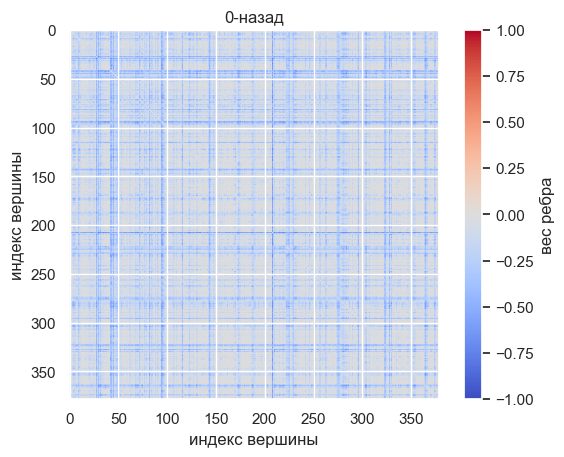

In [14]:
import matplotlib.pyplot as plt

plt.imshow(A_mean_wm_rl_0, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() # отображаем цветовую шкалу
plt.colorbar(label="вес ребра")
plt.title('0-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/0-back task.pdf', format='pdf')
# plt.savefig('img/WM 0-назад.pdf', format='pdf')
plt.show()

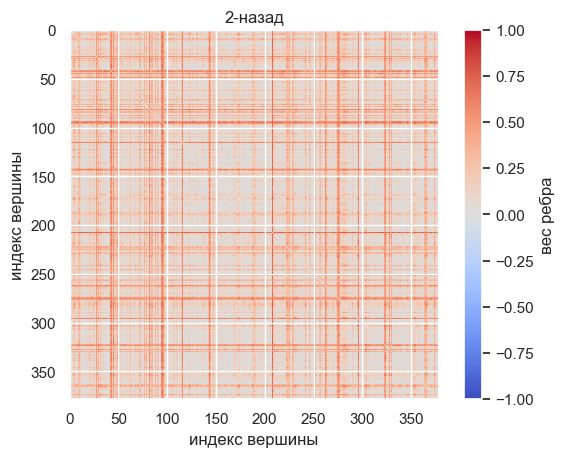

In [15]:
plt.imshow(A_mean_wm_rl_2, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() 
plt.colorbar(label="вес ребра")  # отображаем цветовую шкалу
plt.title('2-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/2-back task.pdf', format='pdf')
# plt.savefig('img/WM 2-назад.pdf', format='pdf')
plt.show()

новые данные

In [58]:
import glob

files_wm = sorted(glob.glob('/Users/daniilvlasenko/Programming/HSE_HCP_fMRI_ensemble_graphs/tmp/train_to_test/*'))
wm_rl_0 = files_wm[::2]
wm_rl_2 = files_wm[1::2]

import numpy
A_mean_wm_rl_0 = []
A_mean_wm_rl_2 = []

for file in wm_rl_0:
    edges = numpy.load(file)
    A_mean_wm_rl_0.append(edges)
A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=0)
    
for file in wm_rl_2:
    edges = numpy.load(file)
    A_mean_wm_rl_2.append(edges)
A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=0)

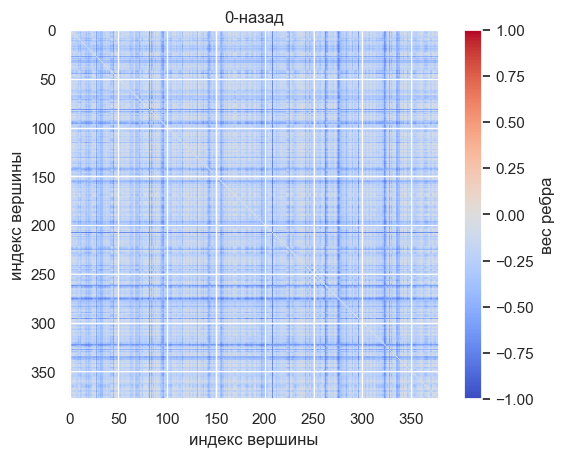

In [59]:
import matplotlib.pyplot as plt

plt.imshow(A_mean_wm_rl_0, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() # отображаем цветовую шкалу
plt.colorbar(label="вес ребра")
plt.title('0-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/0-back task.pdf', format='pdf')
# plt.savefig('img/WM 0-назад.pdf', format='pdf')
plt.show()

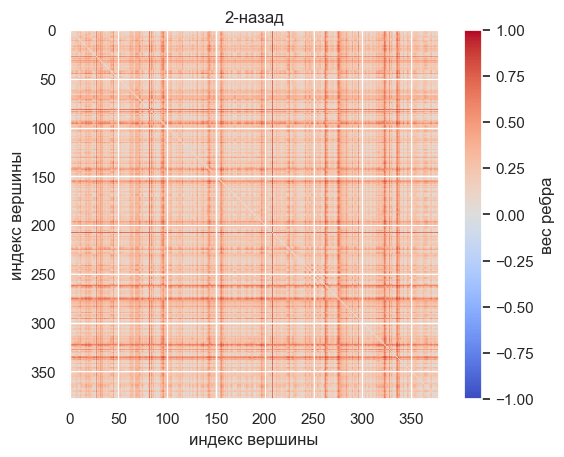

In [60]:
plt.imshow(A_mean_wm_rl_2, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() 
plt.colorbar(label="вес ребра")  # отображаем цветовую шкалу
plt.title('2-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/2-back task.pdf', format='pdf')
# plt.savefig('img/WM 2-назад.pdf', format='pdf')
plt.show()

Точность классификации на основе среднего веса ребра

In [ ]:
import glob
import numpy
import paths

In [20]:
for representation in [paths.folders_mean_ensemble_edges_test_wm, paths.folders_pca_ensemble_edges_test_wm]:
    accuracy = []
    for fold, folder in enumerate(representation): 
        files = sorted(glob.glob(f'{folder}/*'))
        wm_0 = files[::2]
        wm_2 = files[1::2]
        
        import numpy
        A_mean_0 = []
        A_mean_2 = []
        
        for file in wm_0:
            edges = numpy.load(file)
            A_mean_0.append(edges)
        A_mean_0 = numpy.mean(A_mean_0, axis=(1, 2))
            
        for file in wm_2:
            edges = numpy.load(file)
            A_mean_2.append(edges)
        A_mean_2 = numpy.mean(A_mean_2, axis=(1, 2))
        accuracy.append((sum(A_mean_0 < 0) + sum(A_mean_2 > 0)) / (len(A_mean_0) + len(A_mean_2)))
    
    print(accuracy)
    print(f'mean {numpy.mean(accuracy) * 100}, std {numpy.std(accuracy) * 100}\n')

[0.9931506849315068, 0.9827586206896551, 0.9793103448275862, 0.9586206896551724]
mean 97.846008502598, std 1.2536104706462845

[0.9726027397260274, 0.9758620689655172, 0.9724137931034482, 0.9586206896551724]
mean 96.98748228625412, std 0.6640604837759608



In [21]:
for representation in [paths.folders_mean_ensemble_edges_test_gambling, paths.folders_pca_ensemble_edges_test_gambling]:
    accuracy = []
    for fold, folder in enumerate(representation): 
        files = sorted(glob.glob(f'{folder}/*'))
        wm_0 = files[::2]
        wm_2 = files[1::2]
        
        import numpy
        A_mean_0 = []
        A_mean_2 = []
        
        for file in wm_0:
            edges = numpy.load(file)
            A_mean_0.append(edges)
        A_mean_0 = numpy.mean(A_mean_0, axis=(1, 2))
            
        for file in wm_2:
            edges = numpy.load(file)
            A_mean_2.append(edges)
        A_mean_2 = numpy.mean(A_mean_2, axis=(1, 2))
        accuracy.append((sum(A_mean_0 > 0) + sum(A_mean_2 < 0)) / (len(A_mean_0) + len(A_mean_2)))
    
    print(accuracy)
    print(f'mean {numpy.mean(accuracy) * 100}, std {numpy.std(accuracy) * 100}\n')

[0.8801369863013698, 0.8931034482758621, 0.8482758620689655, 0.8586206896551725]
mean 87.00342465753425, std 1.7592256783656355

[0.8595890410958904, 0.8724137931034482, 0.8620689655172413, 0.8517241379310345]
mean 86.14489844119035, std 0.7393298222518868



In [23]:
for representation in [paths.folders_mean_ensemble_edges_test_motor, paths.folders_pca_ensemble_edges_test_motor]:
    accuracy = []
    for fold, folder in enumerate(representation): 
        files = sorted(glob.glob(f'{folder}/*'))
        wm_0 = files[::2]
        wm_2 = files[1::2]
        
        import numpy
        A_mean_0 = []
        A_mean_2 = []
        
        for file in wm_0:
            edges = numpy.load(file)
            A_mean_0.append(edges)
        A_mean_0 = numpy.mean(A_mean_0, axis=(1, 2))
            
        for file in wm_2:
            edges = numpy.load(file)
            A_mean_2.append(edges)
        A_mean_2 = numpy.mean(A_mean_2, axis=(1, 2))
        accuracy.append((sum(A_mean_0 < 0) + sum(A_mean_2 > 0)) / (len(A_mean_0) + len(A_mean_2)))
    
    print(accuracy)
    print(f'mean {numpy.mean(accuracy) * 100}, std {numpy.std(accuracy) * 100}/n')

[0.8767123287671232, 0.8931034482758621, 0.9, 0.8896551724137931]
mean 88.98677373641945, std 0.8459351784251273/n
[0.8801369863013698, 0.8931034482758621, 0.8862068965517241, 0.8931034482758621]
mean 88.81376948512045, std 0.5409638008260599/n


In [25]:
for representation in [paths.folders_mean_ensemble_edges_test_language, paths.folders_pca_ensemble_edges_test_language]:
    accuracy = []
    for fold, folder in enumerate(representation): 
        files = sorted(glob.glob(f'{folder}/*'))
        wm_0 = files[::2]
        wm_2 = files[1::2]
        
        import numpy
        A_mean_0 = []
        A_mean_2 = []
        
        for file in wm_0:
            edges = numpy.load(file)
            A_mean_0.append(edges)
        A_mean_0 = numpy.mean(A_mean_0, axis=(1, 2))
            
        for file in wm_2:
            edges = numpy.load(file)
            A_mean_2.append(edges)
        A_mean_2 = numpy.mean(A_mean_2, axis=(1, 2))
        accuracy.append((sum(A_mean_0 > 0) + sum(A_mean_2 < 0)) / (len(A_mean_0) + len(A_mean_2)))
    
    print(accuracy)
    print(f'mean {numpy.mean(accuracy) * 100}, std {numpy.std(accuracy) * 100}\n')

[0.9931506849315068, 0.996551724137931, 0.9896551724137931, 0.9862068965517241]
mean 99.13911195087387, std 0.38606214072455247

[0.9863013698630136, 0.996551724137931, 0.9793103448275862, 0.9758620689655172]
mean 98.45063769485121, std 0.7906250672463477



In [26]:
for representation in [paths.folders_mean_ensemble_edges_test_social, paths.folders_pca_ensemble_edges_test_social]:
    accuracy = []
    for fold, folder in enumerate(representation): 
        files = sorted(glob.glob(f'{folder}/*'))
        wm_0 = files[::2]
        wm_2 = files[1::2]
        
        import numpy
        A_mean_0 = []
        A_mean_2 = []
        
        for file in wm_0:
            edges = numpy.load(file)
            A_mean_0.append(edges)
        A_mean_0 = numpy.mean(A_mean_0, axis=(1, 2))
            
        for file in wm_2:
            edges = numpy.load(file)
            A_mean_2.append(edges)
        A_mean_2 = numpy.mean(A_mean_2, axis=(1, 2))
        accuracy.append((sum(A_mean_0 > 0) + sum(A_mean_2 < 0)) / (len(A_mean_0) + len(A_mean_2)))
    
    print(accuracy)
    print(f'mean {numpy.mean(accuracy) * 100}, std {numpy.std(accuracy) * 100}\n')

[0.976027397260274, 0.9655172413793104, 0.9724137931034482, 0.9827586206896551]
mean 97.4179263108172, std 0.6228332062518184

[0.9726027397260274, 0.9586206896551724, 0.9724137931034482, 0.9655172413793104]
mean 96.72886159659897, std 0.5761468269534601



In [27]:
for representation in [paths.folders_mean_ensemble_edges_test_relational, paths.folders_pca_ensemble_edges_test_relational]:
    accuracy = []
    for fold, folder in enumerate(representation): 
        files = sorted(glob.glob(f'{folder}/*'))
        wm_0 = files[::2]
        wm_2 = files[1::2]
        
        import numpy
        A_mean_0 = []
        A_mean_2 = []
        
        for file in wm_0:
            edges = numpy.load(file)
            A_mean_0.append(edges)
        A_mean_0 = numpy.mean(A_mean_0, axis=(1, 2))
            
        for file in wm_2:
            edges = numpy.load(file)
            A_mean_2.append(edges)
        A_mean_2 = numpy.mean(A_mean_2, axis=(1, 2))
        accuracy.append((sum(A_mean_0 > 0) + sum(A_mean_2 < 0)) / (len(A_mean_0) + len(A_mean_2)))
    
    print(accuracy)
    print(f'mean {numpy.mean(accuracy) * 100}, std {numpy.std(accuracy) * 100}\n')

[0.9178082191780822, 0.9448275862068966, 0.9482758620689655, 0.9655172413793104]
mean 94.41072272083137, std 1.708744395648996

[0.9178082191780822, 0.9448275862068966, 0.9413793103448276, 0.9655172413793104]
mean 94.23830892772791, std 1.692702256198992



In [28]:
for representation in [paths.folders_mean_ensemble_edges_test_emotion, paths.folders_pca_ensemble_edges_test_emotion]:
    accuracy = []
    for fold, folder in enumerate(representation): 
        files = sorted(glob.glob(f'{folder}/*'))
        wm_0 = files[::2]
        wm_2 = files[1::2]
        
        import numpy
        A_mean_0 = []
        A_mean_2 = []
        
        for file in wm_0:
            edges = numpy.load(file)
            A_mean_0.append(edges)
        A_mean_0 = numpy.mean(A_mean_0, axis=(1, 2))
            
        for file in wm_2:
            edges = numpy.load(file)
            A_mean_2.append(edges)
        A_mean_2 = numpy.mean(A_mean_2, axis=(1, 2))
        accuracy.append((sum(A_mean_0 > 0) + sum(A_mean_2 < 0)) / (len(A_mean_0) + len(A_mean_2)))
    
    print(accuracy)
    print(f'mean {numpy.mean(accuracy) * 100}, std {numpy.std(accuracy) * 100}\n')

[0.8047945205479452, 0.7862068965517242, 0.7344827586206897, 0.7620689655172413]
mean 77.18882853094001, std 2.6379136706513844

[0.7808219178082192, 0.7793103448275862, 0.7344827586206897, 0.7620689655172413]
mean 76.41709966934341, std 1.8656520648472268



Однородность графов

In [29]:
import glob
import paths


for fold_gnn, folder_gnn in enumerate(paths.folders_mean_ensemble_edges_train_wm):
    print('fold_gnn', fold_gnn)
    for fold_ensemble, folder_ensemble in enumerate(folder_gnn): 
        files_wm = sorted(glob.glob(f'{folder_ensemble}/*'))
        wm_rl_0 = files_wm[::2]
        wm_rl_2 = files_wm[1::2]
        
        import numpy
        A_mean_wm_rl_0 = []
        A_mean_wm_rl_2 = []
        
        for file in wm_rl_0:
            edges = numpy.load(file)
            A_mean_wm_rl_0.append(edges)
        A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=(1, 2))
            
        for file in wm_rl_2:
            edges = numpy.load(file)
            A_mean_wm_rl_2.append(edges)
        A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=(1, 2))
        print('fold_ensemble', fold_ensemble)
        print('acc for 0:', sum(A_mean_wm_rl_0 < 0) / len(A_mean_wm_rl_0) * 100 )
        print('acc for 1:', sum(A_mean_wm_rl_2 > 0) / len(A_mean_wm_rl_2) * 100 )

fold_gnn 0
fold_ensemble 0
acc for 0: 97.93103448275862
acc for 1: 97.93103448275862
fold_ensemble 1
acc for 0: 96.55172413793103
acc for 1: 96.55172413793103
fold_ensemble 2
acc for 0: 97.24137931034483
acc for 1: 100.0
fold_gnn 1
fold_ensemble 0
acc for 0: 97.26027397260275
acc for 1: 95.2054794520548
fold_ensemble 1
acc for 0: 97.93103448275862
acc for 1: 97.93103448275862
fold_ensemble 2
acc for 0: 96.55172413793103
acc for 1: 99.3103448275862
fold_gnn 2
fold_ensemble 0
acc for 0: 95.8904109589041
acc for 1: 98.63013698630137
fold_ensemble 1
acc for 0: 98.62068965517241
acc for 1: 98.62068965517241
fold_ensemble 2
acc for 0: 98.62068965517241
acc for 1: 95.17241379310344
fold_gnn 3
fold_ensemble 0
acc for 0: 95.2054794520548
acc for 1: 99.31506849315068
fold_ensemble 1
acc for 0: 99.3103448275862
acc for 1: 99.3103448275862
fold_ensemble 2
acc for 0: 95.86206896551724
acc for 1: 98.62068965517241


fold_gnn 0
fold_ensemble 0
acc for 0: 96.55172413793103
acc for 1: 95.86206896551724


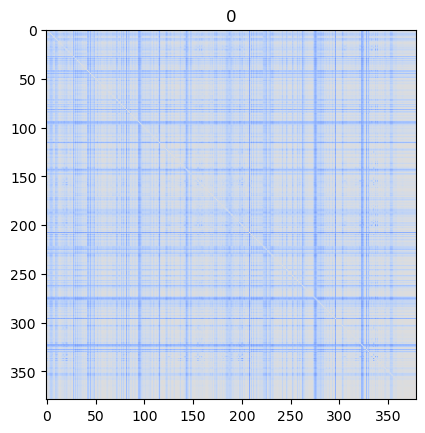

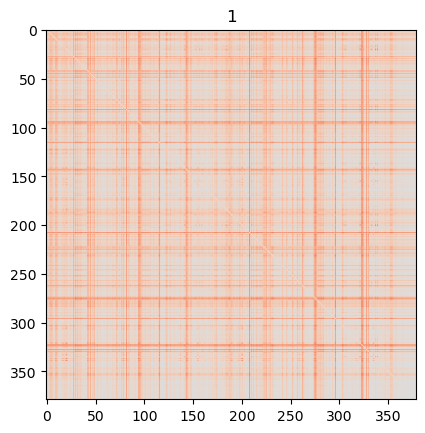

fold_ensemble 1
acc for 0: 96.55172413793103
acc for 1: 97.24137931034483


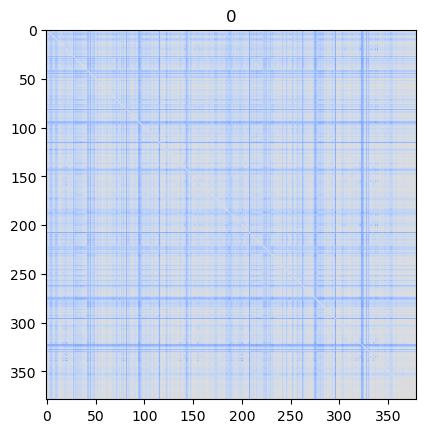

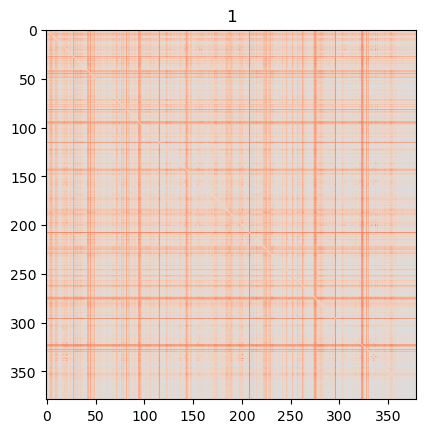

fold_ensemble 2
acc for 0: 96.55172413793103
acc for 1: 99.3103448275862


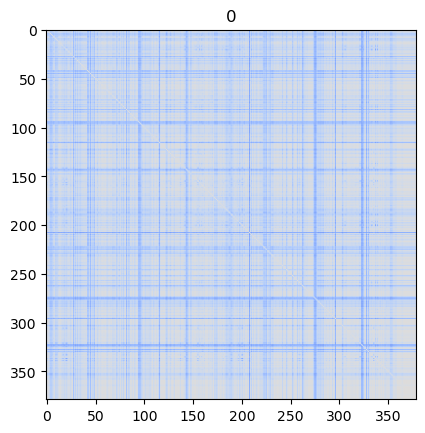

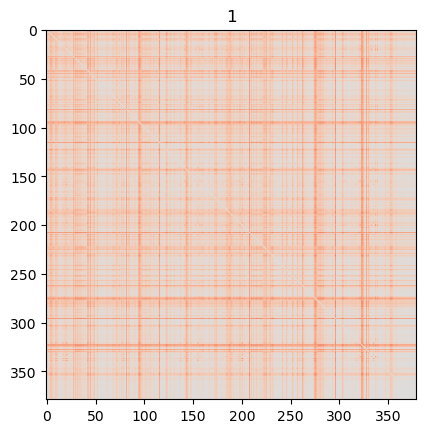

fold_gnn 1
fold_ensemble 0
acc for 0: 95.2054794520548
acc for 1: 95.8904109589041


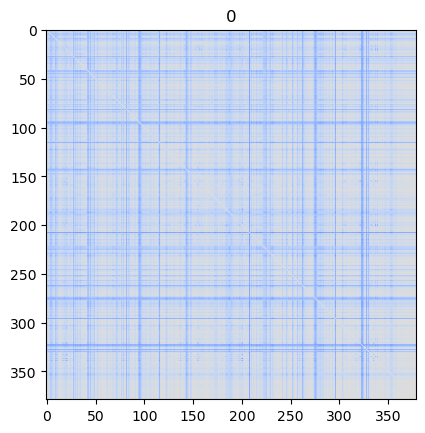

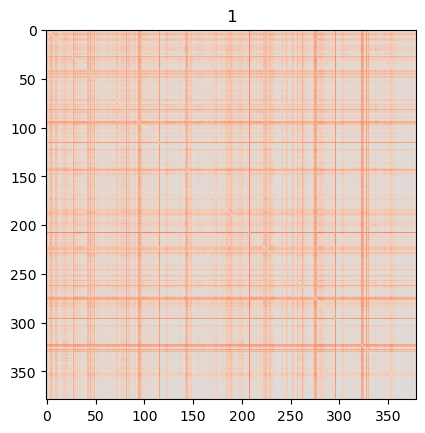

fold_ensemble 1
acc for 0: 97.24137931034483
acc for 1: 95.17241379310344


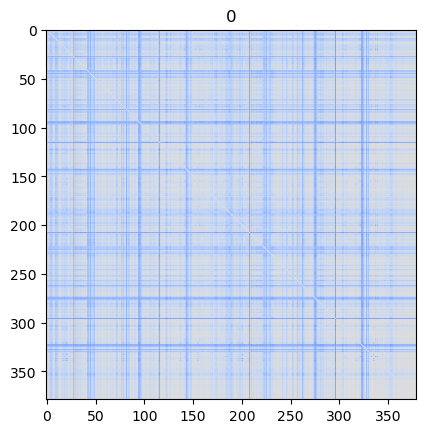

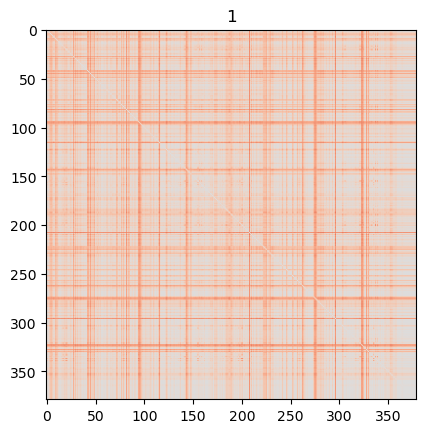

fold_ensemble 2
acc for 0: 95.86206896551724
acc for 1: 98.62068965517241


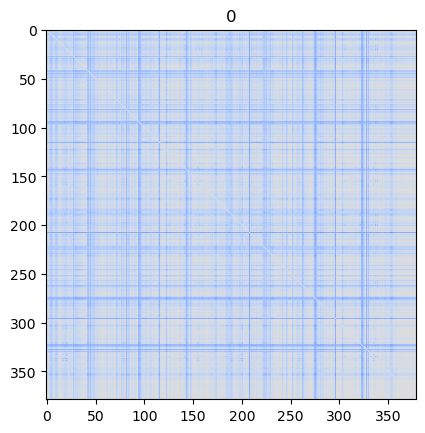

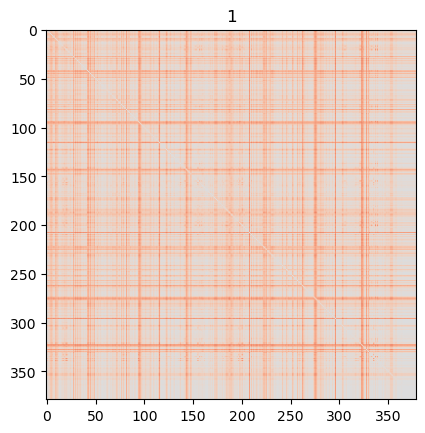

fold_gnn 2
fold_ensemble 0
acc for 0: 95.8904109589041
acc for 1: 95.8904109589041


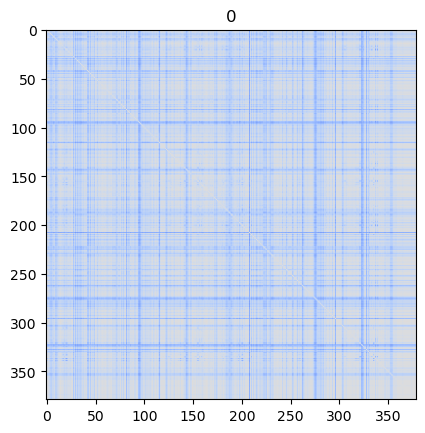

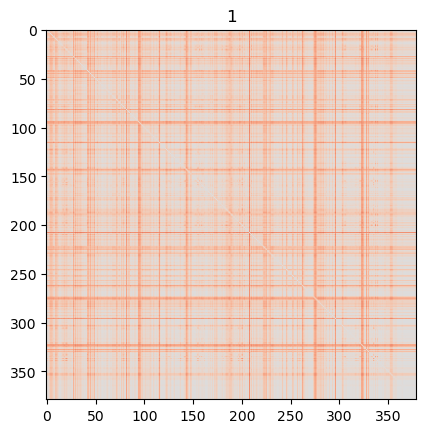

fold_ensemble 1
acc for 0: 97.93103448275862
acc for 1: 97.93103448275862


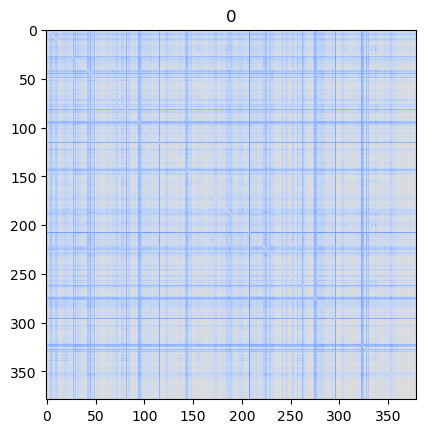

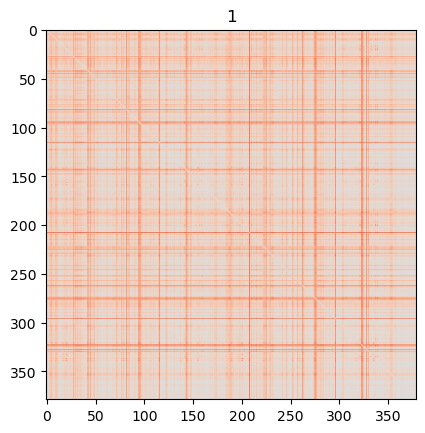

fold_ensemble 2
acc for 0: 97.93103448275862
acc for 1: 93.79310344827586


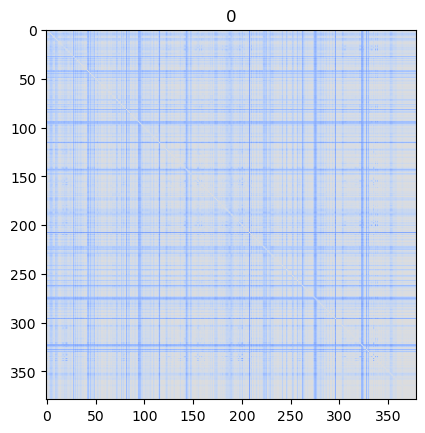

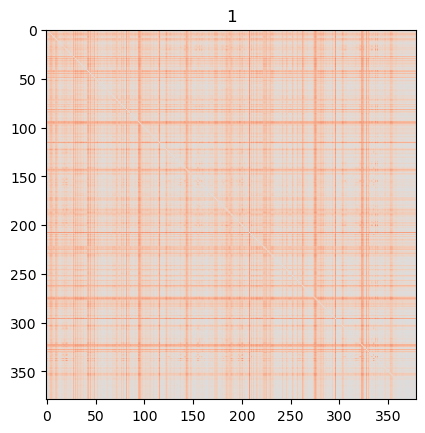

fold_gnn 3
fold_ensemble 0
acc for 0: 93.83561643835617
acc for 1: 98.63013698630137


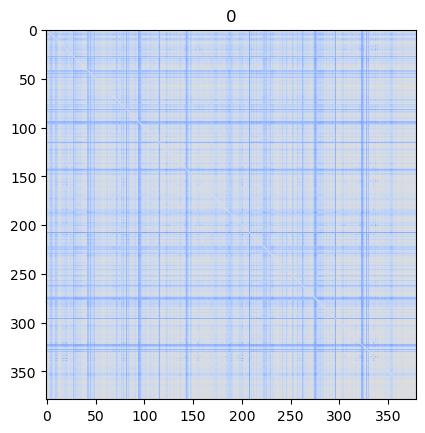

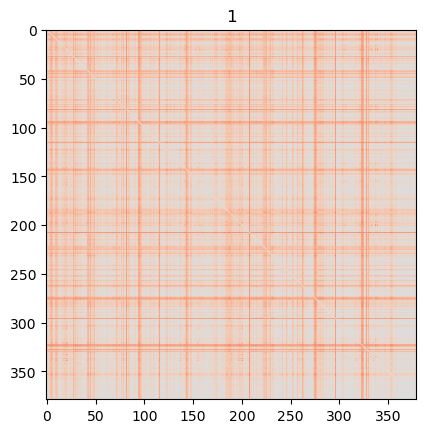

fold_ensemble 1
acc for 0: 99.3103448275862
acc for 1: 97.93103448275862


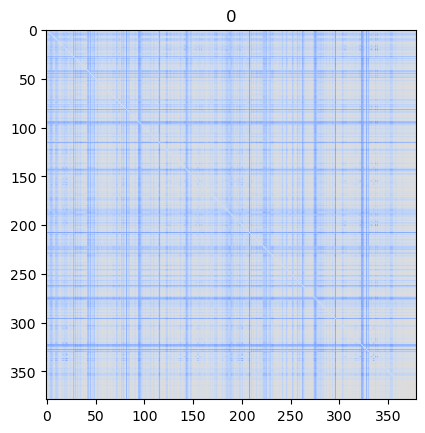

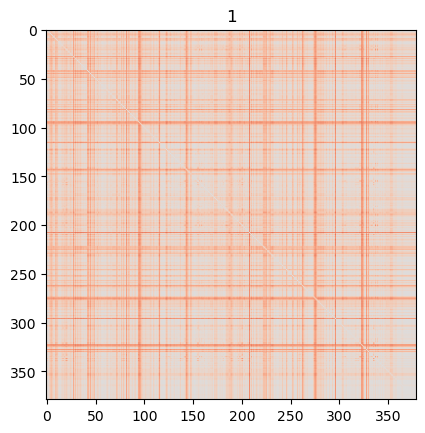

fold_ensemble 2
acc for 0: 96.55172413793103
acc for 1: 96.55172413793103


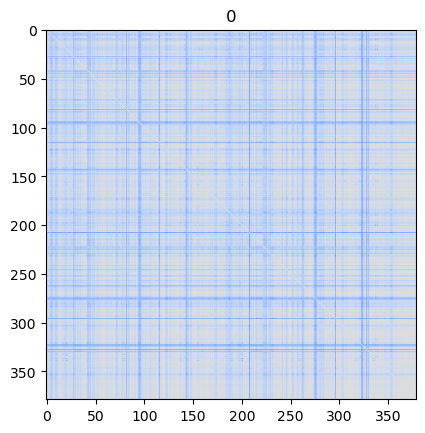

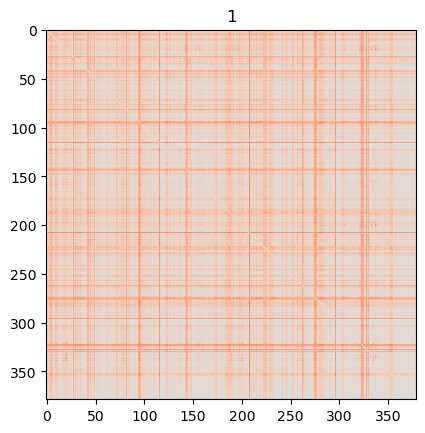

In [32]:
import glob
import paths
import matplotlib.pyplot as plt



for fold_gnn, folder_gnn in enumerate(paths.folders_pca_ensemble_edges_train_wm):
    print('fold_gnn', fold_gnn)
    for fold_ensemble, folder_ensemble in enumerate(folder_gnn): 
        files_wm = sorted(glob.glob(f'{folder_ensemble}/*'))
        wm_rl_0 = files_wm[::2]
        wm_rl_2 = files_wm[1::2]
        
        import numpy
        A_mean_wm_rl_0 = []
        A_mean_wm_rl_2 = []
        
        for file in wm_rl_0:
            edges = numpy.load(file)
            A_mean_wm_rl_0.append(edges)
        A_mean_wm_rl_0_class = numpy.mean(A_mean_wm_rl_0, axis=(1, 2))
        A_mean_wm_rl_0_img = numpy.mean(A_mean_wm_rl_0, axis=0)
            
        for file in wm_rl_2:
            edges = numpy.load(file)
            A_mean_wm_rl_2.append(edges)
        A_mean_wm_rl_2_class = numpy.mean(A_mean_wm_rl_2, axis=(1, 2))
        A_mean_wm_rl_2_img = numpy.mean(A_mean_wm_rl_2, axis=0)

        print('fold_ensemble', fold_ensemble)
        print('acc for 0:', sum(A_mean_wm_rl_0_class < 0) / len(A_mean_wm_rl_0_class) * 100 )
        print('acc for 1:', sum(A_mean_wm_rl_2_class > 0) / len(A_mean_wm_rl_2_class) * 100 )

        plt.imshow(A_mean_wm_rl_0_img, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('0')
        plt.show()
        
        plt.imshow(A_mean_wm_rl_2_img, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('1')
        plt.show()

TypeError: 'int' object is not iterable